In [10]:
import json
import matplotlib.pyplot as plt


%matplotlib inline

In [11]:
# Load the JSON file
with open("my_json.json", "r") as f:
    layers = json.load(f)

import json
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize the G-code toolpath with arrows
def visualize_toolpath_with_arrows(layers):
    plt.figure(figsize=(10, 10))

    # Iterate through each layer and use different colors
    colors = plt.cm.viridis_r([i / len(layers) for i in range(len(layers))])

    for layer_idx, layer in enumerate(layers):
        for path in layer["paths"]:
            x_vals = [cmd["x"] for cmd in path["movements"] if cmd["x"] is not None]
            y_vals = [cmd["y"] for cmd in path["movements"] if cmd["y"] is not None]

            # Plot the path
            plt.plot(x_vals, y_vals, color=colors[layer_idx], alpha=0.7)

            # Adding arrows to indicate direction
            for i in range(1, len(x_vals)):
                plt.arrow(x_vals[i-1], y_vals[i-1], 
                          x_vals[i] - x_vals[i-1], y_vals[i] - y_vals[i-1],
                          head_width=0.3, head_length=0.3, fc=colors[layer_idx], ec=colors[layer_idx])

    plt.title("G-code Toolpath Visualization with Arrows")
    plt.xlabel("X-axis (mm)")
    plt.ylabel("Y-axis (mm)")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.show()


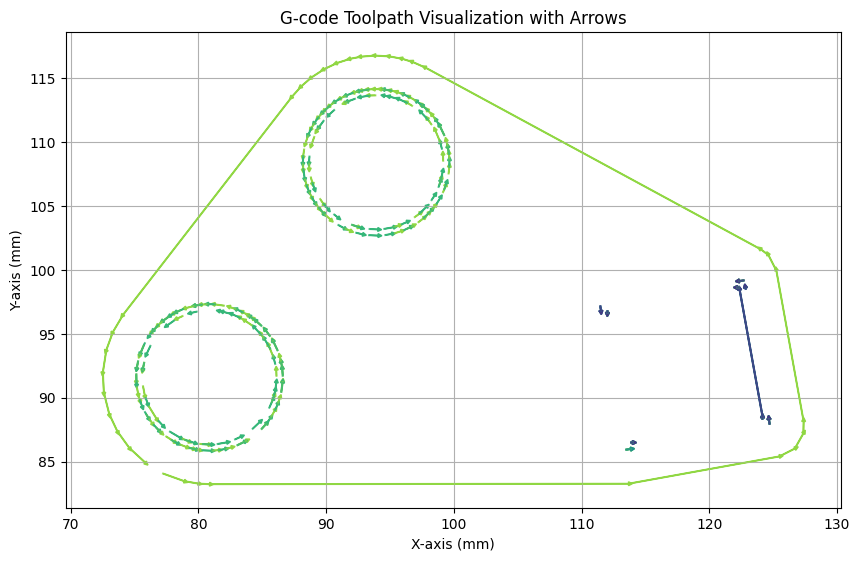

In [12]:
# Visualize the toolpath with arrows
visualize_toolpath_with_arrows(layers)